# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.002
0.002
0.0
-0.001
0.0
-0.001
0.0
-0.001
0.0
0.002
0.003
-0.007
-0.003
-0.002
-0.002
0.0
0.0
0.0
0.002
0.0
0.001
0.001
0.003
0.001
0.001
0.001
0.002
0.003
-0.001
0.0
-0.002
-0.002
0.0
-0.001
-0.003
-0.001
0.997
0.995
0.995
0.997
0.997
0.997
0.997
0.997
0.997
1.972
1.972
2.976
2.974
2.973
2.974
3.981
3.977
3.977
3.978
4.976
4.976
4.975
4.975
5.975
5.975
5.975
5.973
6.679
6.678
6.676
6.679
7.381
7.378
7.378
7.378
8.375
8.378
8.38
8.379
8.379
9.382
9.38
9.379
9.38
10.386
10.383
10.38
10.38
11.379
11.38
11.38
11.38
12.373
12.377
12.377
12.378
12.378
13.374
13.377
13.378
13.38
13.379
14.11
14.111
14.111
14.817
14.82
14.824
14.823
14.82
15.81
15.809
15.807
15.805
16.798
16.798
16.796
16.795
17.781
17.791
17.791
17.786
18.779
18.778
18.777
18.777
19.771
19.771
19.77
19.769
20.755
20.753
20.754
20.756
21.437
21.438
21.438
21.438
22.148
22.148
22.148
23.15
23.149
24.153
24.153
24.151
24.155
25.137
25.137
25.132
25.129
25.129
26.133
26.132
26.132
26.132
27.136
27.136
28.1

56.889
56.888
56.889
56.89
56.889
56.887
56.887
56.886
56.887
56.886
56.887
56.885
56.887
56.886
56.886
56.886
56.883
56.883
56.884
56.883
56.883
56.881
56.881
56.882
56.882
56.882
56.883
56.886
56.882
56.88
56.879
56.882
56.881
56.911
56.969
56.999
57.026
57.027
57.025
57.024
57.024
57.04
57.039
57.043
57.039
57.039
57.039
57.039
57.04
57.037
57.039
57.038
57.036
57.04
57.04
57.04
57.039
57.039
57.038
57.038
57.037
57.036
57.034
57.036
57.033
57.034
57.034
57.034
57.034
57.035
57.035
57.032
57.033
57.034
57.035
57.031
57.032
57.031
57.03
57.032
57.034
57.032
57.032
57.034
57.029
57.033
57.032
57.029
57.029
57.029
57.027
57.164
57.191
57.244
57.296
57.296
57.297
57.296
57.296
57.296
57.296
57.296
57.295
57.293
57.294
57.293
57.294
57.294
57.283
57.303
57.309
57.31
57.306
57.307
57.307
57.307
57.307
57.303
57.306
57.305
57.307
57.306
57.307
57.309
57.593
57.594
57.604
57.604
57.603
57.601
57.603
57.603
57.6
57.6
58.098
58.098
58.102
58.101
58.098
58.103
58.101
58.1
58.096
58.101
58.368


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1386,2772,59.158
1387,2774,59.158
1388,2776,59.158
1389,2778,59.158


<IPython.core.display.Javascript object>


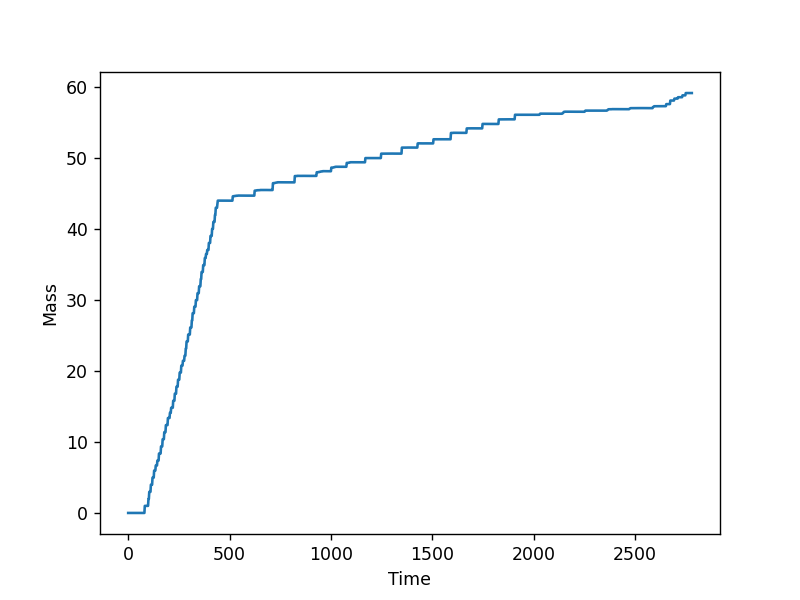

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_030423_S259-264.csv')